In [1]:
import os
import zipfile
import random
import numpy as np
import shutil
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
def split_data(src_folder, split_ratio):
    classes = os.listdir(src_folder)
    for c in classes:
        src_class_folder = os.path.join(src_folder, c)

        if not os.path.isdir(src_class_folder):
            continue

        train_class_folder = os.path.join(src_folder, 'train', c)
        validation_class_folder = os.path.join(src_folder, 'validation', c)
        test_class_folder = os.path.join(src_folder, 'test', c)

        for folder in [train_class_folder, validation_class_folder, test_class_folder]:
            if not os.path.exists(folder):
                os.makedirs(folder)

        images = [img for img in os.listdir(src_class_folder) if os.path.isfile(os.path.join(src_class_folder, img))]
        random.seed(871)  
        random.shuffle(images)
        split_point1 = int(len(images) * split_ratio[0])
        split_point2 = split_point1 + int(len(images) * split_ratio[1])

        for i, img in enumerate(images):
            src_img = os.path.join(src_class_folder, img)
            if i < split_point1:
                dest_img = os.path.join(train_class_folder, img)
            elif i < split_point2:
                dest_img = os.path.join(validation_class_folder, img)
            else:
                dest_img = os.path.join(test_class_folder, img)

            shutil.copy(src_img, dest_img)


split_ratio = (0.7, 0.15, 0.15)
src_folder = '/content/gdrive/MyDrive/kvasir-dataset-v2'

split_data(src_folder, split_ratio)


In [12]:
import os

dataset_path = "/content/gdrive/MyDrive/kvasir-dataset-v2"
train_dir = "train"
validation_dir = "validation"
test_dir = "test"

train_path = os.path.join(dataset_path, train_dir)
validation_path = os.path.join(dataset_path, validation_dir)
test_path = os.path.join(dataset_path, test_dir)

if os.path.exists(train_path) and os.path.exists(validation_path) and os.path.exists(test_path):
    print("Data paths are correct.")
else:
    print("One or more data paths are incorrect. Please check the directory names.")


Data paths are correct.


In [16]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

src_folder = "/content/gdrive/MyDrive/kvasir-dataset-v2"  # Replace with the path to your folder containing train, validation, and test subfolders

train_dataset = image_dataset_from_directory(
    os.path.join(src_folder, 'train'),
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
    label_mode='categorical')

validation_dataset = image_dataset_from_directory(
    os.path.join(src_folder, 'validation'),
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
    label_mode='categorical')

test_dataset = image_dataset_from_directory(
    os.path.join(src_folder, 'test'),
    shuffle=False,
    batch_size=32,
    image_size=(224, 224),
    label_mode='categorical')


Found 5600 files belonging to 8 classes.
Found 1200 files belonging to 8 classes.
Found 1200 files belonging to 8 classes.


In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

train_dataset = train_dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))



In [19]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
175/175 [==============================] - 124s 697ms/step - loss: 1.0466 - accuracy: 0.5430 - val_loss: 0.6721 - val_accuracy: 0.6642
Epoch 2/20
175/175 [==============================] - 122s 696ms/step - loss: 0.7932 - accuracy: 0.6436 - val_loss: 0.6651 - val_accuracy: 0.6933
Epoch 3/20
175/175 [==============================] - 122s 696ms/step - loss: 0.6920 - accuracy: 0.6795 - val_loss: 0.6144 - val_accuracy: 0.7175
Epoch 4/20
175/175 [==============================] - 122s 696ms/step - loss: 0.6517 - accuracy: 0.6927 - val_loss: 0.5834 - val_accuracy: 0.7133
Epoch 5/20
175/175 [==============================] - 122s 697ms/step - loss: 0.6232 - accuracy: 0.7184 - val_loss: 0.6037 - val_accuracy: 0.7292
Epoch 6/20
175/175 [==============================] - 122s 695ms/step - loss: 0.6036 - accuracy: 0.7237 - val_loss: 0.5551 - val_accuracy: 0.7558
Epoch 7/20
175/175 [==============================] - 121s 695ms/step - loss: 0.5593 - accuracy: 0.7441 - val_loss: 0.5624 -

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


38/38 [==============================] - 22s 571ms/step
Confusion Matrix
[[115  27   0   0   0   0   6   2]
 [ 61  86   0   2   0   0   1   0]
 [  0   0  87   0   3  60   0   0]
 [  0   0   0 139   0   0   5   6]
 [  0   0   2   0 147   0   1   0]
 [  0   0  28   0   5 117   0   0]
 [  0   0   0  16   3   0  97  34]
 [  2   0   0   8   4   0  15 121]]
Classification Report
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.65      0.77      0.70       150
dyed-resection-margins       0.76      0.57      0.65       150
           esophagitis       0.74      0.58      0.65       150
          normal-cecum       0.84      0.93      0.88       150
        normal-pylorus       0.91      0.98      0.94       150
         normal-z-line       0.66      0.78      0.72       150
                polyps       0.78      0.65      0.71       150
    ulcerative-colitis       0.74      0.81      0.77       150

              accuracy                        

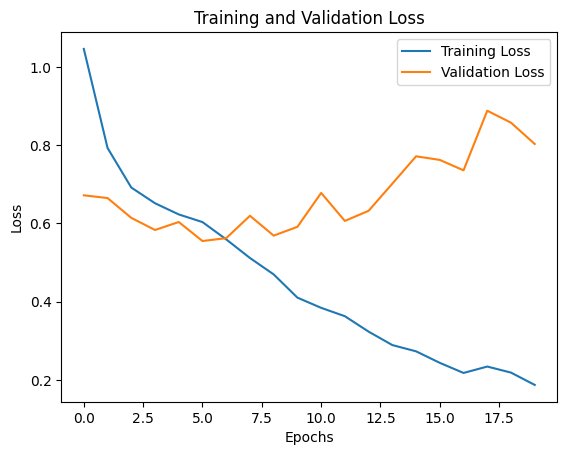

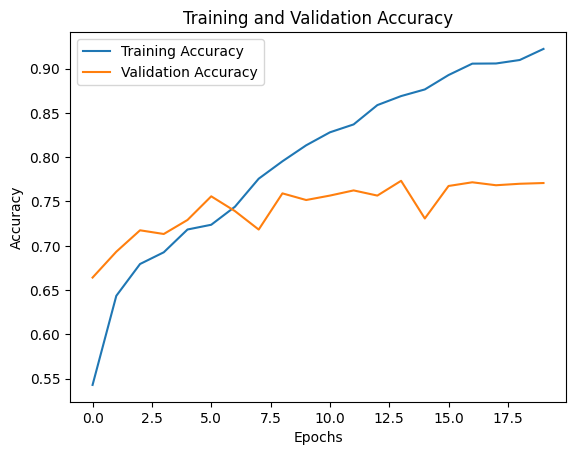

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
modified_model = Sequential()

# First convolutional layer
modified_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modified_model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
modified_model.add(Conv2D(128, (3, 3), activation='relu'))
modified_model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
modified_model.add(Conv2D(256, (3, 3), activation='relu'))
modified_model.add(MaxPooling2D((2, 2)))

# Fourth convolutional layer
modified_model.add(Conv2D(512, (3, 3), activation='relu'))
modified_model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
modified_model.add(Flatten())
modified_model.add(Dense(256, activation='relu'))
modified_model.add(Dropout(0.5))
modified_model.add(Dense(8, activation='softmax'))

# Compile the modified model
modified_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the modified model
modified_history = modified_model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

# Evaluate the modified model
modified_test_loss, modified_test_accuracy = modified_model.evaluate(test_generator)
print(f"Modified Test Loss: {modified_test_loss}, Modified Test Accuracy: {modified_test_accuracy}")


Epoch 1/15
175/175 [==============================] - 129s 720ms/step - loss: 1.1250 - accuracy: 0.5102 - val_loss: 0.7692 - val_accuracy: 0.6142
Epoch 2/15
175/175 [==============================] - 125s 715ms/step - loss: 0.8057 - accuracy: 0.6243 - val_loss: 0.7579 - val_accuracy: 0.6542
Epoch 3/15
175/175 [==============================] - 125s 717ms/step - loss: 0.7294 - accuracy: 0.6602 - val_loss: 0.6195 - val_accuracy: 0.7242
Epoch 4/15
175/175 [==============================] - 125s 716ms/step - loss: 0.6856 - accuracy: 0.6775 - val_loss: 0.6300 - val_accuracy: 0.6892
Epoch 5/15
175/175 [==============================] - 125s 713ms/step - loss: 0.6557 - accuracy: 0.6964 - val_loss: 0.5859 - val_accuracy: 0.7392
Epoch 6/15
175/175 [==============================] - 125s 714ms/step - loss: 0.6059 - accuracy: 0.7264 - val_loss: 0.6278 - val_accuracy: 0.7208
Epoch 7/15
175/175 [==============================] - 125s 714ms/step - loss: 0.5608 - accuracy: 0.7425 - val_loss: 0.5292 -

In [29]:
modified_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 256)     

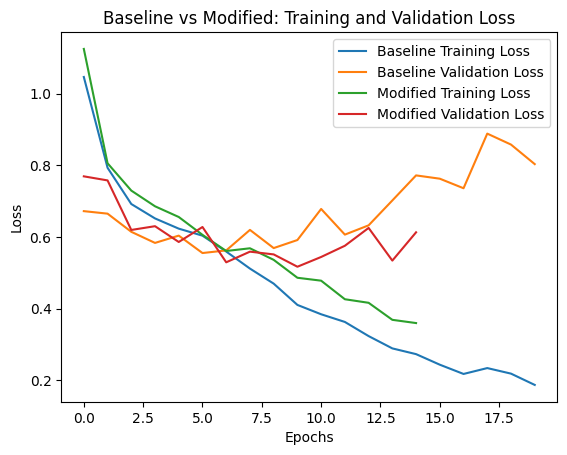

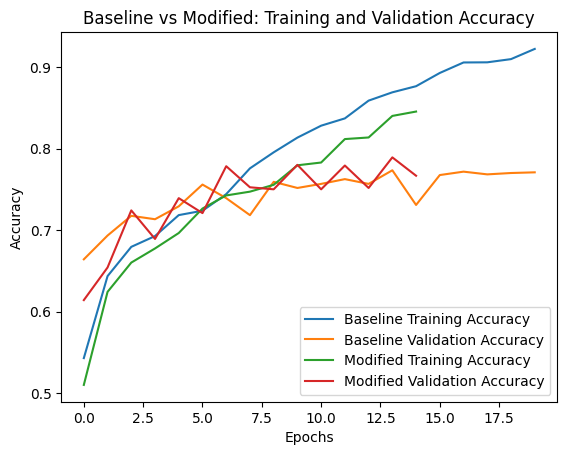

In [30]:
# Plot baseline and modified training and validation loss
plt.plot(history.history['loss'], label='Baseline Training Loss')
plt.plot(history.history['val_loss'], label='Baseline Validation Loss')
plt.plot(modified_history.history['loss'], label='Modified Training Loss')
plt.plot(modified_history.history['val_loss'], label='Modified Validation Loss')
plt.title('Baseline vs Modified: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot baseline and modified training and validation accuracy
plt.plot(history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(modified_history.history['accuracy'], label='Modified Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Modified Validation Accuracy')
plt.title('Baseline vs Modified: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Y_pred = modified_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


38/38 [==============================] - 22s 592ms/step
Confusion Matrix
[[105  39   0   0   0   0   6   0]
 [ 45 104   0   0   0   0   1   0]
 [  0   0 116   0   2  32   0   0]
 [  0   0   0 129   0   0  12   9]
 [  0   0   3   0 146   0   1   0]
 [  0   0  64   0   3  83   0   0]
 [  1   0   0   2   2   0 123  22]
 [  2   0   0   4   3   0  31 110]]
Classification Report
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.69      0.70      0.69       150
dyed-resection-margins       0.73      0.69      0.71       150
           esophagitis       0.63      0.77      0.70       150
          normal-cecum       0.96      0.86      0.91       150
        normal-pylorus       0.94      0.97      0.95       150
         normal-z-line       0.72      0.55      0.63       150
                polyps       0.71      0.82      0.76       150
    ulcerative-colitis       0.78      0.73      0.76       150

              accuracy                        

In [32]:
import keras
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Load the pre-trained MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

# Create the final model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to use the pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Update the image size in ImageDataGenerator and fit the model
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, train_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_path, validation_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, test_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
history = transfer_model.fit(train_generator, steps_per_epoch=175, epochs=15, validation_data=validation_generator, validation_steps=38)

# Evaluate the model on the test set
test_loss, test_accuracy = transfer_model.evaluate(test_generator, steps=38)
print(f'Transfer Learning Test Loss: {test_loss}, Transfer Learning Test Accuracy: {test_accuracy}')


9406464/9406464 [==============================] - 2s 0us/step
Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Epoch 1/15
175/175 [==============================] - 133s 744ms/step - loss: 0.6111 - accuracy: 0.7620 - val_loss: 0.4672 - val_accuracy: 0.8008
Epoch 2/15
175/175 [==============================] - 128s 733ms/step - loss: 0.3683 - accuracy: 0.8459 - val_loss: 0.3847 - val_accuracy: 0.8442
Epoch 3/15
175/175 [==============================] - 128s 732ms/step - loss: 0.2960 - accuracy: 0.8807 - val_loss: 0.3702 - val_accuracy: 0.8542
Epoch 4/15
175/175 [==============================] - 128s 733ms/step - loss: 0.2478 - accuracy: 0.9030 - val_loss: 0.4290 - val_accuracy: 0.8342
Epoch 5/15
175/175 [==============================] - 128s 734ms/step - loss: 0.2138 - accuracy: 0.9168 - val_loss: 0.3633 - val_accuracy: 0.8583
Epoch 6/15
175/175 [==============================] - 128s 731ms/step - loss: 0.1

In [33]:
transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

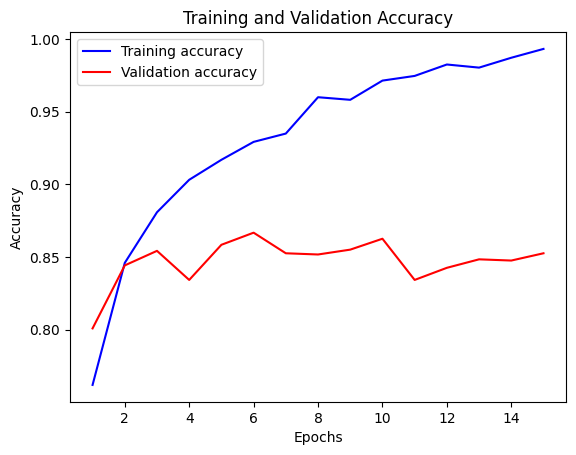

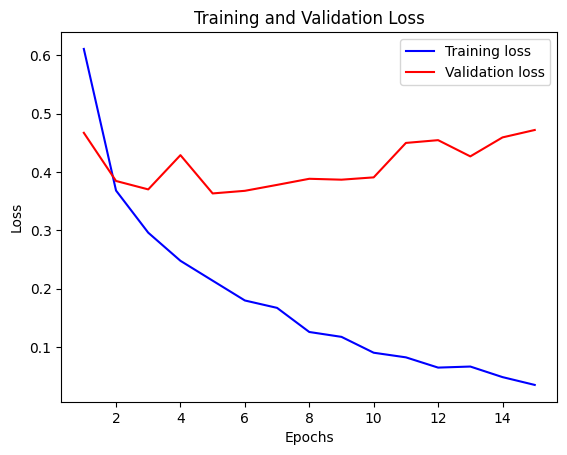

In [35]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    # Get the training accuracy and loss
    acc = history.history['accuracy']
    loss = history.history['loss']
    
    # Get the validation accuracy and loss
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    # Get the number of epochs
    epochs = range(1, len(acc) + 1)
    
    # Plot the training and validation accuracy
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot the training and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming you have the history from model.fit()
plot_training_curves(history)


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Y_pred = transfer_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


38/38 [==============================] - 24s 621ms/step
Confusion Matrix
[[107  31   0   0   0   0  10   2]
 [ 22 126   0   2   0   0   0   0]
 [  0   0 113   0   2  34   1   0]
 [  0   0   0 144   0   0   4   2]
 [  0   0   1   0 148   1   0   0]
 [  0   0  45   0   3 101   1   0]
 [  6   0   0   5   2   0 135   2]
 [  0   1   0   1   0   0   3 145]]
Classification Report
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.79      0.71      0.75       150
dyed-resection-margins       0.80      0.84      0.82       150
           esophagitis       0.71      0.75      0.73       150
          normal-cecum       0.95      0.96      0.95       150
        normal-pylorus       0.95      0.99      0.97       150
         normal-z-line       0.74      0.67      0.71       150
                polyps       0.88      0.90      0.89       150
    ulcerative-colitis       0.96      0.97      0.96       150

              accuracy                        